In [ ]:
%pip install git+https://github.com/cioos-siooc/ocean-data-parser.git

In [1]:
import matplotlib.pyplot as plt
import requests

from ocean_data_parser.parsers import seabird

# Download test data

Seabird test data is available here:

https://github.com/cioos-siooc/ocean-data-parser/tree/main/tests/parsers_test_files/seabird


In [2]:
def download_file_from_github(raw_url):
    """Download a github raw file locally."""
    file_path = raw_url.split("/")[-1]
    response = requests.get(raw_url)
    with open(file_path, "w") as f:
        f.write(response.text)
    return file_path


raw_files = [
    "https://raw.githubusercontent.com/cioos-siooc/ocean-data-parser/main/tests/parsers_test_files/seabird/1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv",
    "https://raw.githubusercontent.com/cioos-siooc/ocean-data-parser/main/tests/parsers_test_files/seabird/MI18MHDR.btl",
]

[download_file_from_github(file) for file in raw_files]

['1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv', 'MI18MHDR.btl']

# Read CSV


In [3]:
ds_csv = seabird.cnv("1_datCnv_SBE19plus_01907674_2022_05_17_0002.cnv")
ds_csv

<xarray.Dataset>
Dimensions:     (index: 894)
Coordinates:
  * index       (index) int64 0 1 2 3 4 5 6 7 ... 887 888 889 890 891 892 893
Data variables: (12/13)
    scan        (index) int64 241 242 243 244 245 ... 1130 1131 1132 1133 1134
    timeS       (index) float64 60.0 60.25 60.5 60.75 ... 282.8 283.0 283.2
    prdM        (index) float64 3.256 3.259 3.239 3.226 ... -0.238 -0.238 -0.245
    tv290C      (index) float64 10.51 10.51 10.52 10.52 ... 10.39 10.39 10.38
    c0mSPercm   (index) float64 31.62 31.69 31.71 31.7 ... 3.339 4.482 5.419
    sbeox0V     (index) float64 2.035 2.031 2.027 2.027 ... 2.458 2.446 2.435
    ...          ...
    seaTurbMtr  (index) float64 0.319 0.284 0.267 0.257 ... 0.0 0.0 0.0 0.0
    par         (index) float64 326.1 325.2 329.0 ... 2.836e+03 2.774e+03
    dzPerdtM    (index) float64 -5.39e-14 0.001 -0.004 ... 0.001 0.001 -0.001
    CStarTr0    (index) float64 91.15 90.04 90.04 90.04 ... 31.95 31.94 31.95
    CStarAt0    (index) float64 0.3706 0.4196 0.4195 ... 4.564 4.565 4.564
    flag        (index) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes: (12/23)
    instrument_type:                  SBE19plus 
    history:                          2022-05-18T09:00:11 - {'in': 'C:\\Users...
    Workarea:                         QUADRA
    bad_flag:                         -9.990e-29
    conductivity_sn:                  7674
    data_xml:                         {"ApplicationData": {"Seaterm232": {"So...
    ...                               ...
    software_version:                 2.8.0.119
    start_time:                       2022-05-17T11:21:24
    start_time_comment:               [Instrument's time stamp, header]
    system_upload_time:               2022-05-17T13:44:17
    temperature_sn:                   7674
    units:                            specified

<Figure size 800x1200 with 0 Axes>

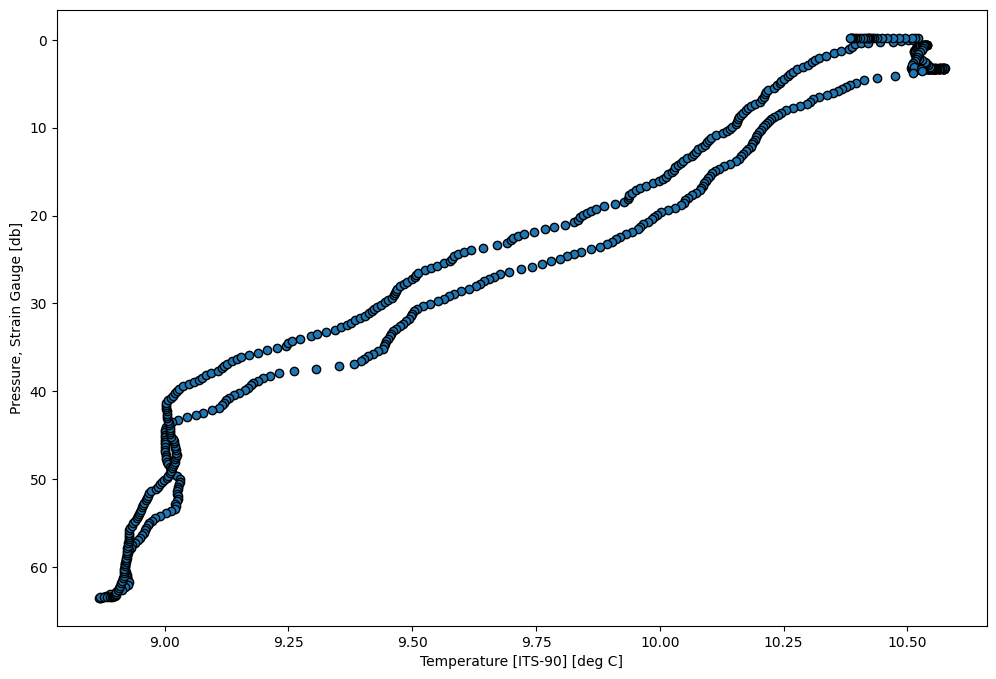

In [4]:
fig = plt.figure(figsize=(8, 12))
ds_csv.plot.scatter(
    x="tv290C", y="prdM", figsize=(12, 8), edgecolor="black", yincrease=False
)

# Parse Bottle data


In [5]:
ds_btl = seabird.btl("MI18MHDR.btl")
ds_btl

<xarray.Dataset>
Dimensions:            (bottle: 12)
Coordinates:
  * bottle             (bottle) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables: (12/37)
    prDM               (bottle) float64 137.5 98.48 69.5 ... 8.6 1.975 1.821
    depFM              (bottle) float64 140.2 100.4 70.87 ... 8.77 2.014 1.857
    t090C              (bottle) float64 4.094 4.518 4.886 ... 16.07 16.57 16.56
    c0uSPercm          (bottle) float64 176.1 178.0 179.8 ... 240.9 243.9 243.9
    specc              (bottle) float64 302.6 301.6 300.8 ... 293.2 293.3 293.3
    wetStar            (bottle) float64 0.1716 0.2711 0.8172 ... 0.1654 0.1794
    ...                 ...
    timeS_sdev         (bottle) float64 0.595 0.595 0.595 ... 0.595 0.595 0.595
    altM_sdev          (bottle) float64 0.13 0.0 0.0 0.0 ... 39.3 0.21 0.0 0.0
    latitude_sdev      (bottle) float64 1e-05 0.0 0.0 0.0 ... 1e-05 0.0 0.0 0.0
    longitude_sdev     (bottle) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    scan_sdev          (bottle) int64 14 14 14 14 14 14 14 14 14 14 14 14
    time               (bottle) datetime64[ns] 2016-06-23T19:04:57 ... 2016-0...
Attributes: (12/45)
    instrument_type:                            SBE 911plus V 5.0
    history:                                    Latitude/Longitude added to s...
    time_coverage_start:                        2016-06-23T19:04:57Z
    time_coverage_end:                          2016-06-23T19:18:59Z
    time_coverage_duration:                     P0DT0H14M2S
    geospatial_lat_min:                         42.72698
    ...                                         ...
    start_time:                                 2016-06-23T18:51:28
    start_time_comment:                         [NMEA time, header]
    store_lat_lon_data:                         Append to Every Scan
    system_upload_time:                         2016-06-23T13:51:30
    system_utc:                                 2016-06-23T18:51:30
    temperature_sn:                             5553

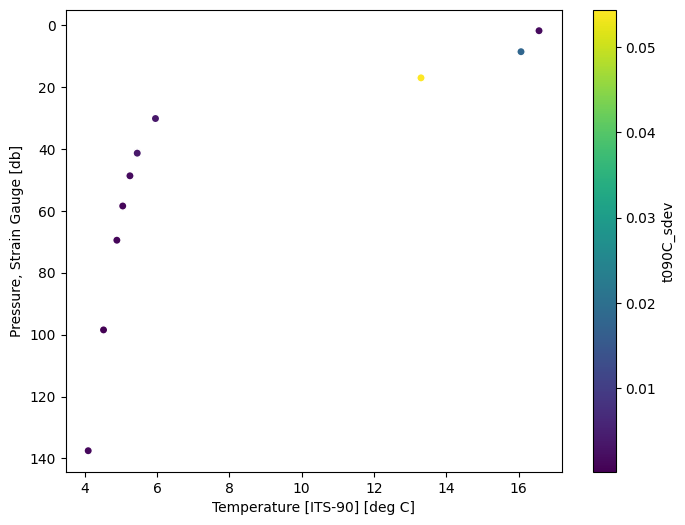

In [7]:
fig = plt.figure(figsize=(8, 6))
ds_btl.plot.scatter(x="t090C", y="prDM", hue="t090C_sdev", yincrease=False)

## Save to NetCDF


In [8]:
# Save to NetCDF
ds_btl.to_netcdf("MI18MHDR.btl.nc")